In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('../')) # or the path to your source code
sys.path.insert(0, module_path)

In [4]:
from analyzer.main import PatchTrack
from analyzer import common
from analyzer import constant
try:
    import magic
except ImportError as err:
    print (err)
    sys.exit(-1)

In [5]:
# read tokens from list
token_file = '../tokens.txt'

token_list = []
with open(token_file, 'r') as f:
    for line in f.readlines():
        token_list.append(line.strip('\n'))

# manually add in notebook
# token_list = ["nadHJok13mdkaamda", "ajd1819kdamda","..."]

lenTokens = len(token_list)

Create a magic cookie. This is needed during classification

In [6]:
common.verbose = True

try:
    common.magic_cookie = magic.open(magic.MAGIC_MIME)
    common.magic_cookie.load()
except AttributeError:
    common.magic_cookie = magic.Magic(mime=True, uncompress=True)
common.verbose_print('[-] initialized magic cookie\n')

In [7]:
data = (token_list)

In [8]:
experiment = PatchTrack(data)

In [9]:
pr_project_pair = experiment.build_pr_project_pairs()

==================== Building PR <> Project Pair ==============================
==================== Successful! ==============================


In [10]:
# take a peek of the the data
pr_project_pair[0:4]

[{'41': 'Hochfrequenz/migmose'},
 {'158': 'Hochfrequenz/kohlrahbi'},
 {'1091': 'kube-hetzner/terraform-hcloud-kube-hetzner'},
 {'3': 'leptonSystems/sendbox'}]

In [11]:

print(len(pr_project_pair))

285



Starting classification for GitHub, - , ChatGPT...
Classification finished.
Classification Runtime: 154.03514909744263

Bar plot of the patch classifications for GitHub -> ChatGPT


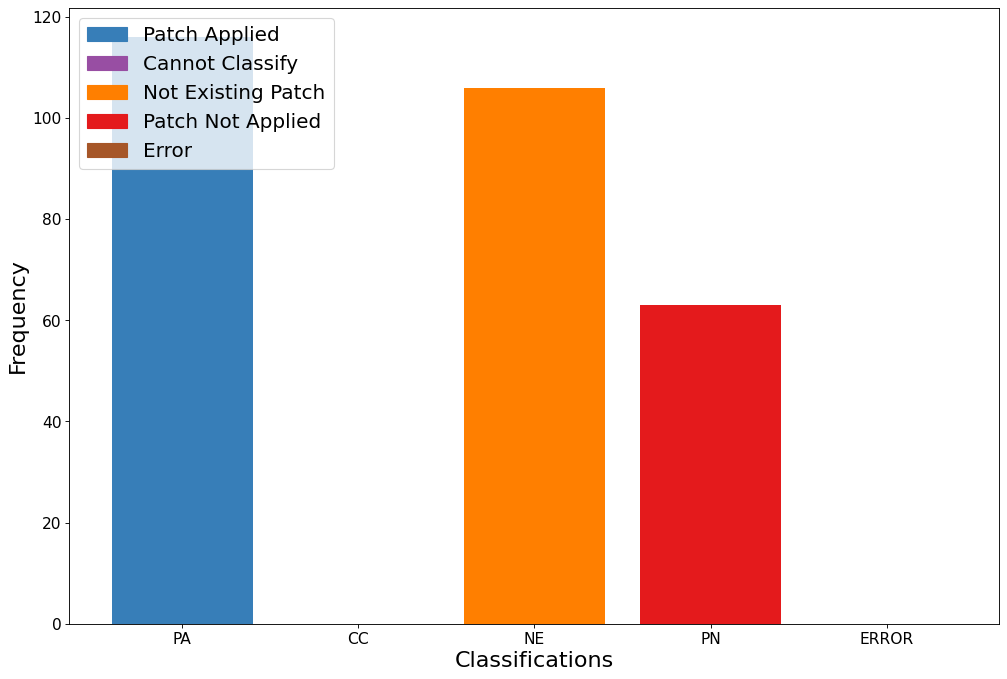

In [12]:
experiment.run_classification(pr_project_pair)

In [13]:
# Patches
patch_classes = experiment.df_patch_class()

In [16]:
PA = patch_classes[patch_classes['Patch Classification'] == "PA"]
PA = PA.drop_duplicates(subset=['Pull Request', 'Repo'])
PA.to_csv(f'../output/N{constant.NGRAM_SIZE}_PA_PATCH.csv')
PA.shape

(116, 6)

In [17]:
NE = patch_classes[patch_classes['Patch Classification'] == 'NE']
NE = NE.drop_duplicates(subset=['Pull Request', 'Repo'])
NE.to_csv(f'../output/N{constant.NGRAM_SIZE}_NE_PATCH.csv')
NE.shape

(106, 6)

In [18]:
patch_classes = experiment.df_patch_class()
PN = patch_classes[patch_classes['Patch Classification'] == 'PN']
PN = PN.drop_duplicates(subset=['Pull Request', 'Repo'])
PN.to_csv(f'../output/N{constant.NGRAM_SIZE}_PN_PATCH.csv')
PN.shape

(63, 6)

In [19]:
d = experiment.df_file_class()
d.to_csv(f'src/output/N{constant.NGRAM_SIZE}_ALL_PATCH_WITH_DUPLICATES.csv')
d.shape

(88512, 12)

In [20]:
df = experiment.df_file_class()
df.drop_duplicates(subset=['Pull Request', 'Repo'], inplace=True)
df.to_csv(f'../output/N{constant.NGRAM_SIZE}_ALL_PATCH.csv')
df.shape

(285, 12)

In [1]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=['PA'],
    y=[115],
    name="Patch Applied (PA)",
    marker_color='#00A0A0'
))
fig.add_trace(go.Bar(
    x=['PN'],
    y=[64],
    name="Patch Not Applied (PN)",
    marker_color='#082a54'
))
fig.add_trace(go.Bar(
    x=['NE'],
    y=[106],
    name="Non-Existent (NE)",
    marker_color='#a00000'
))
fig.add_trace(go.Bar(
    x=['CC'],
    y=[0],
    name="Cannot Classify",
    marker_color='purple'
))
fig.add_trace(go.Bar(
    x=['EE'],
    y=[0],
    name="Error (EE)",
    marker_color='#A05000'
))
fig.update_layout(
    xaxis_title="Classifications",
    yaxis_title="Frequency",
    plot_bgcolor= "rgba(0, 0, 0, 0)",
    font_color="black",
    font_size=12,
    height=350,
    width=650,
    bargap=0.45
)
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    # showline=True,
    linecolor='black',
    # gridcolor='lightgrey'
    # orientation='h'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    # showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    # orientation='h'
    # tickangle=330
)
fig.update_layout(
    # autosize=True,
    # try to play around height and width values 
    legend=dict(
    yanchor="top",
    y=0.95,
    xanchor="left",
    x=0.61,
    bordercolor="gray",
    borderwidth=1,
    itemsizing="constant", 
    itemwidth=30,
    font=dict(
            # family="Courier",
            size=12,
        ),
))
fig.show()
# fig.write_image("classification.pdf", width=650, height=350)


In [26]:
# Create the bar chart and modify as per the instructions
fig = go.Figure(go.Bar(
            x = [6, 9, 9, 10, 11, 19],
            y = ['Internal Improvements and Documentation',
                 'Clarification and Correction',
                 'Technical Limitations and Preferences',
                 'Specific Functionality Enhancement',
                 'Methodological Guidance',
                 'Adaptation and Tailored Solutions'
                 ],
            orientation='h',
            marker_color='#082a54'))

# Remove gray background and set background to white
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    # showline=True,
    linecolor='black',
    # gridcolor='lightgrey'
    # orientation='h'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    # showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    # orientation='h'
    # tickangle=330
)

# Add axis labels
fig.update_layout(
    # xaxis_title="Number of Animals",  # Label for X-axis
    # yaxis_title="Types of Animals",  # Label for Y-axis
    xaxis_title="Frequency",
    yaxis_title="Theme",
    plot_bgcolor= "rgba(0, 0, 0, 0)",
    font_color="black",
    font_size=12,
    height=300,
    width=600,
    # bargap=0.45
)

# Show the figure
fig.show()
# fig.write_image("pn_themes.pdf", width=600, height=300)

In [32]:
# Create the bar chart and modify as per the instructions
fig = go.Figure(go.Bar(
            x = [9, 11, 25, 61],
            y = [ 'Debugging and Optimization Strategies',
                 'Education and Knowledge Sharing',
                 'Documentation, Communication, & Translation',
                 'Conceptual Guidance & Theoretical Advice',
                 ],
            orientation='h',
            marker_color='#a00000'))

# Remove gray background and set background to white
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    # showline=True,
    linecolor='black',
    # gridcolor='lightgrey'
    # orientation='h'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    # showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    # orientation='h'
    # tickangle=330
)

# Add axis labels
fig.update_layout(
    # xaxis_title="Number of Animals",  # Label for X-axis
    # yaxis_title="Types of Animals",  # Label for Y-axis
    xaxis_title="Frequency",
    yaxis_title="Theme",
    plot_bgcolor= "rgba(0, 0, 0, 0)",
    font_color="black",
    font_size=12,
    height=300,
    width=600,
    # bargap=0.45
)

# Show the figure
fig.show()
fig.write_image("ne_themes.pdf", width=600, height=300)